In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Assignment 4

### Implementation of Neural Network in TensorFlow

Your Name and PRN:
- Name: 
- PRN : 

## 1. Import Statements

In [34]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections.abc import Callable
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

In [35]:
# gpus = tf.config.list_physical_devices('GPU')

# try:
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), 'Physical GPUs', len(logical_gpus), 'Logical GPUs')
# except:
#     print('Invalid Device')

## 2. Setup Global Parameters

In [36]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 2001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:black;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [37]:
x, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;color:black;">
DataFrames are easier to visualize
</p>

In [38]:
data_df= pd.DataFrame(x, columns=['A', 'B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [40]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [41]:
data_df['target'].unique()

array([0, 1])

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

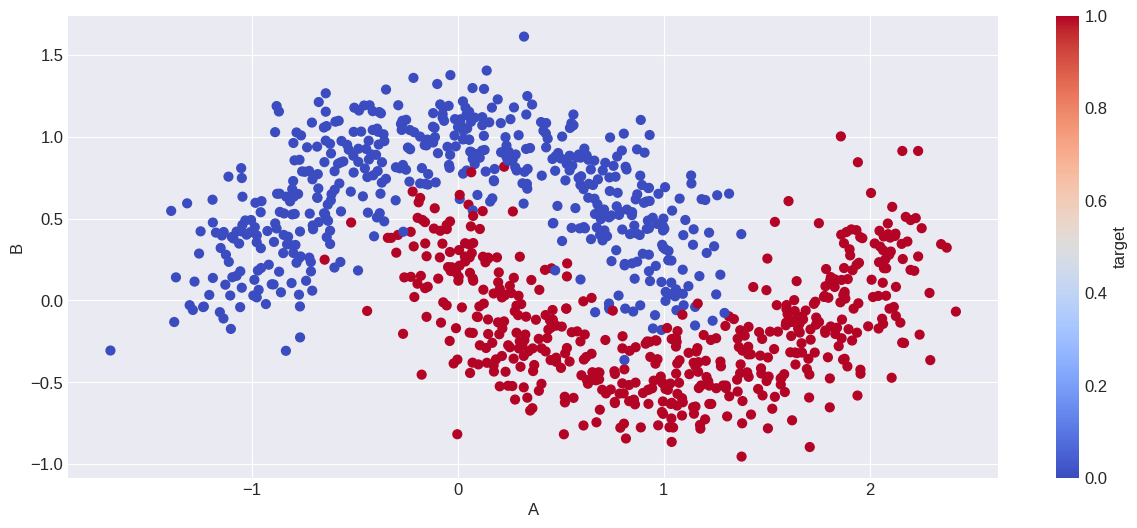

In [42]:
data_df.plot.scatter('A','B', s=40, c='target', cmap=CMAP) # type: ignore

<Axes: xlabel='target', ylabel='count'>

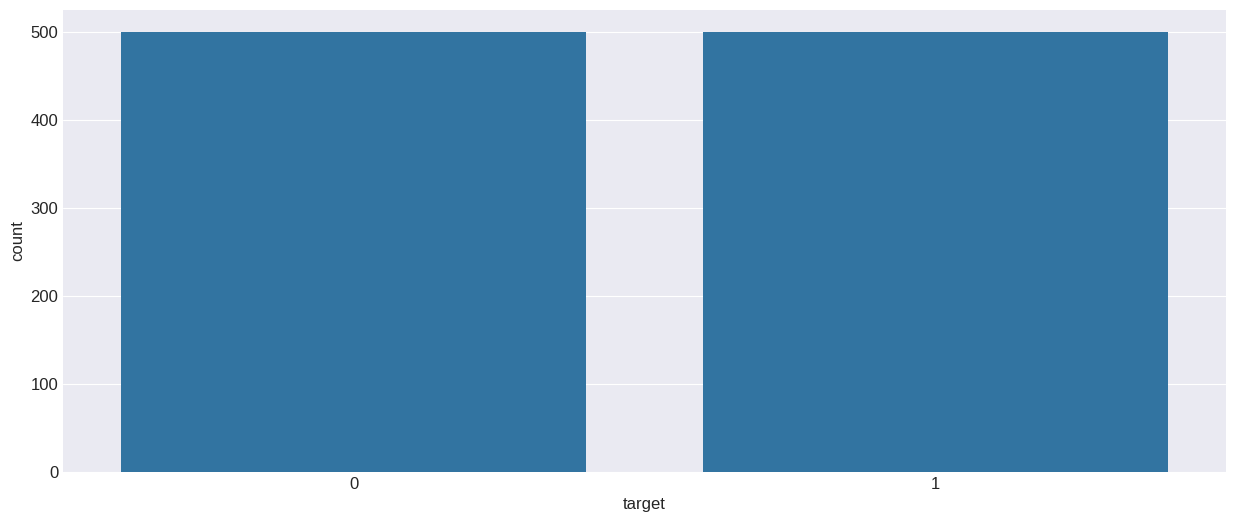

In [43]:
sns.barplot(data_df['target'].value_counts())

<Axes: xlabel='A', ylabel='B'>

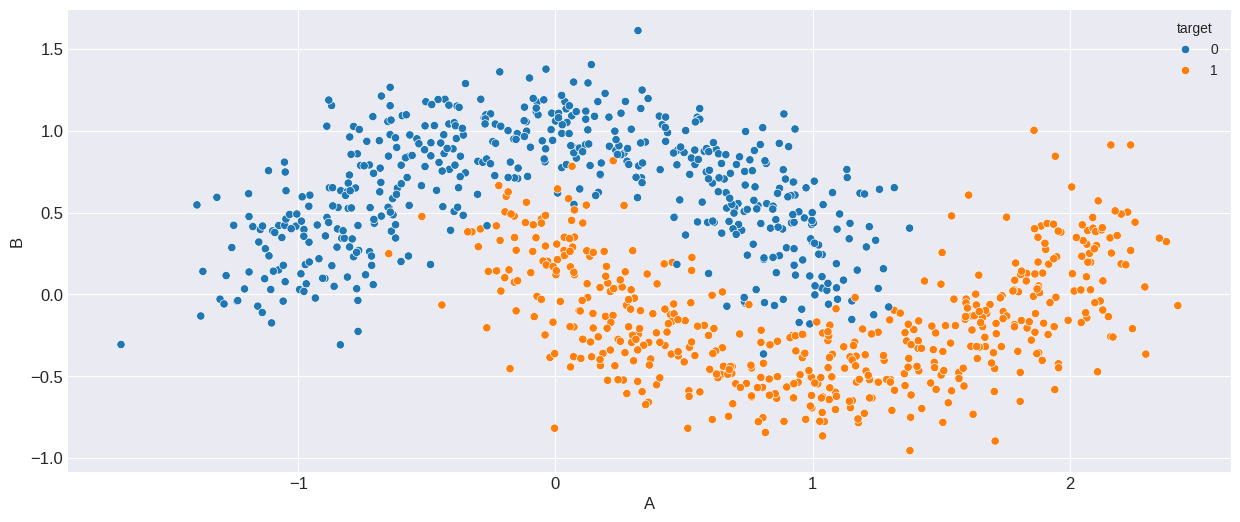

In [44]:
sns.scatterplot(data_df, x='A',y= 'B', hue='target')

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(2)
])

In [47]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True )

In [48]:
model.compile(optimizer='rmsprop',
              loss=loss_fn,
              metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train,
        validation_data=[X_test, y_test],
        epochs=EPOCHS,
        verbose=2
        )

Epoch 1/2001


25/25 - 1s - loss: 0.8027 - accuracy: 0.3375 - val_loss: 0.7816 - val_accuracy: 0.3150 - 754ms/epoch - 30ms/step
Epoch 2/2001
25/25 - 0s - loss: 0.7375 - accuracy: 0.3963 - val_loss: 0.7213 - val_accuracy: 0.3750 - 46ms/epoch - 2ms/step
Epoch 3/2001
25/25 - 0s - loss: 0.6845 - accuracy: 0.4950 - val_loss: 0.6681 - val_accuracy: 0.5300 - 52ms/epoch - 2ms/step
Epoch 4/2001
25/25 - 0s - loss: 0.6377 - accuracy: 0.7312 - val_loss: 0.6207 - val_accuracy: 0.8400 - 52ms/epoch - 2ms/step
Epoch 5/2001
25/25 - 0s - loss: 0.5960 - accuracy: 0.8587 - val_loss: 0.5795 - val_accuracy: 0.8450 - 62ms/epoch - 2ms/step
Epoch 6/2001
25/25 - 0s - loss: 0.5601 - accuracy: 0.8550 - val_loss: 0.5438 - val_accuracy: 0.8300 - 55ms/epoch - 2ms/step
Epoch 7/2001
25/25 - 0s - loss: 0.5290 - accuracy: 0.8363 - val_loss: 0.5128 - val_accuracy: 0.8150 - 55ms/epoch - 2ms/step
Epoch 8/2001
25/25 - 0s - loss: 0.5017 - accuracy: 0.8263 - val_loss: 0.4857 - val_accuracy: 0.8150 - 60ms/epoch - 2ms/step
Epoch 9/2001
25/25 

In [51]:
res_df = pd.DataFrame(history.history)

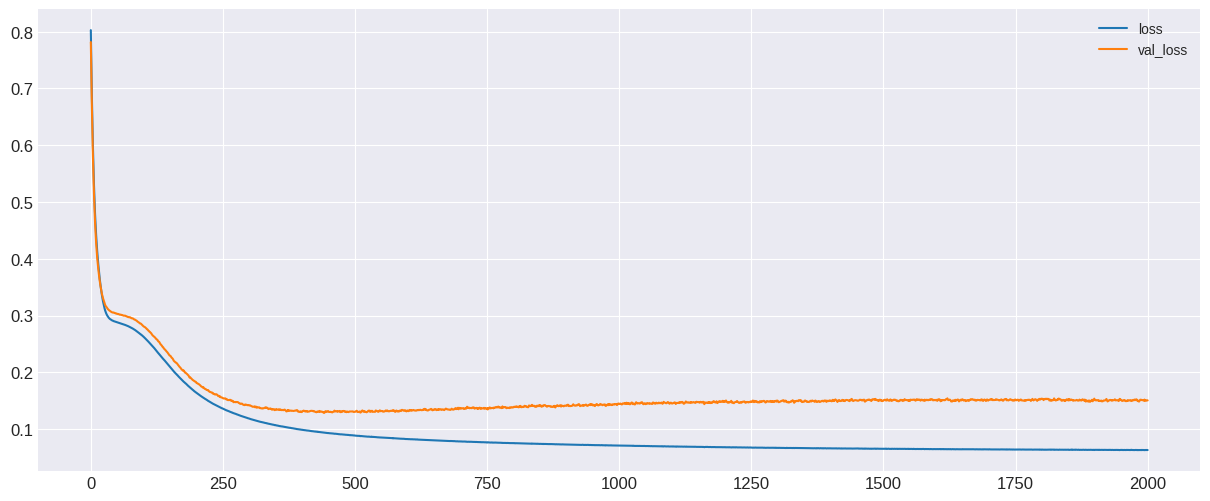

In [52]:
res_df.plot(y = ['loss','val_loss']);

In [53]:
res_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.802669,0.33750,0.781645,0.315
1,0.737542,0.39625,0.721323,0.375
2,0.684533,0.49500,0.668058,0.530
3,0.637690,0.73125,0.620715,0.840
4,0.595987,0.85875,0.579547,0.845


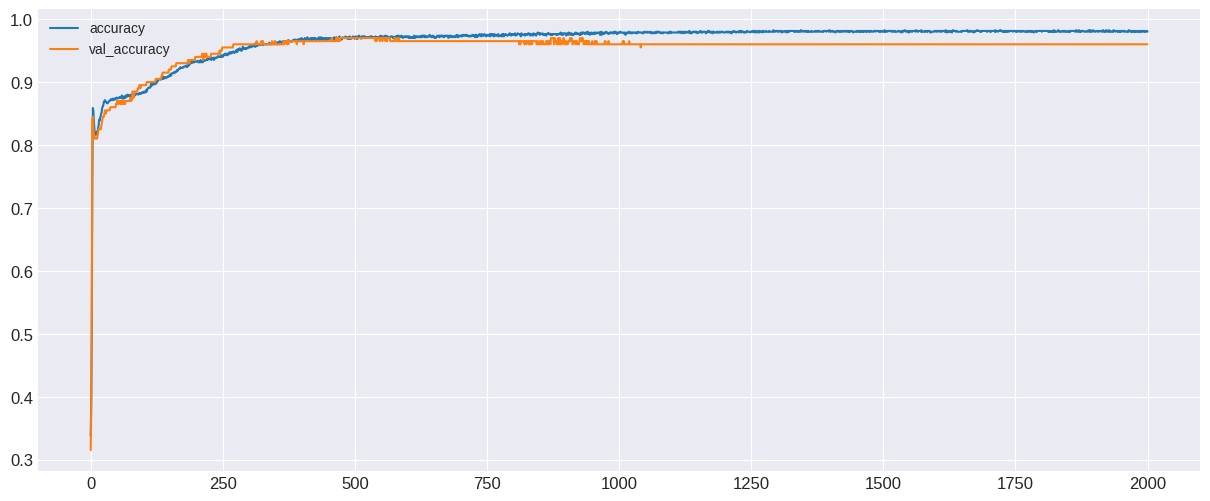

In [54]:
res_df.plot(y = ['accuracy','val_accuracy']);

In [55]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 978us/step - loss: 0.0626 - accuracy: 0.9800


[0.06256284564733505, 0.9800000190734863]

In [56]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9600


[0.15063713490962982, 0.9599999785423279]

In [57]:
y_pred = model.predict(X_train)

25/25 [==============================] - 0s 799us/step


In [58]:
accuracy_score(np.argmax(y_pred,axis = 1),y_train)

0.98

In [59]:
y_pred = model.predict(X_test)
accuracy_score(np.argmax(y_pred,axis = 1),y_test)

7/7 [==============================] - 0s 1ms/step


0.96

In [60]:
def fn_plot_decision_boundary(pred_func: model, X_tr: np.ndarray, y_tr: np.ndarray, X_ts :  np.ndarray, y_ts:  np.ndarray,):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis = 1)
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )
        

  64/3377 [..............................] - ETA: 2s 

3377/3377 [==============================] - 2s 681us/step


Text(0.5, 1.0, 'Decision Boundary')

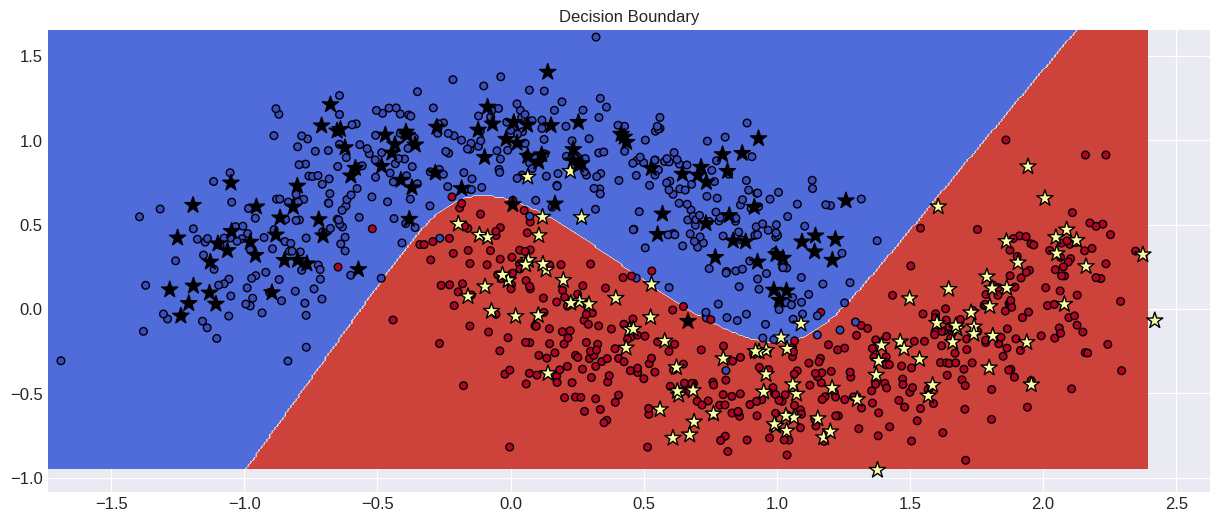

In [61]:
fn_plot_decision_boundary(model,X_train, y_train, X_test, y_test)

plt.title('Decision Boundary')